# Clustering dengan K-Means

**K-Means** adalah algoritma _unsupervised learning_ yang umum digunakan untuk **clustering**. Meskipun bukan algoritma klasifikasi dalam arti sebenarnya, hasil klasterisasi dari K-Means sering digunakan untuk _pseudo-klasifikasi_, terutama saat label kelas tersedia setelah proses clustering.

---

⚙️ Langkah-langkah Algoritma K-Means

Tujuan utama K-Means adalah untuk membagi data ke dalam \\( K \\) kelompok atau _cluster_ berdasarkan kedekatan jarak (biasanya jarak Euclidean).

Langkah-langkah algoritma:

1. Pilih jumlah klaster \\( K \\).
2. Inisialisasi \\( K \\) centroid secara acak.
3. Ulangi hingga konvergen:
   - **Assign data ke centroid terdekat:**

  $$
  C_i = \left\{ x_j : \| x_j - \mu_i \|^2 \leq \| x_j - \mu_k \|^2 \quad \forall k = 1, ..., K \right\}
  $$

   - **Update posisi centroid:**

     $$
     \mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j
     $$

---

🧠 Klasifikasi Menggunakan Hasil K-Means

Jika label kelas tersedia, kita dapat menetapkan label mayoritas pada tiap klaster sebagai label prediksi.

Untuk setiap klaster \\( i \\), kita cari label terbanyak (_mode_) dari data dalam klaster tersebut dan menganggapnya sebagai label klasifikasi untuk semua anggota klaster itu.

---

📚 Kelebihan dan Kekurangan K-Means

**✅ Kelebihan:**
- Sederhana dan cepat.
- Efektif untuk dataset besar.

**❌ Kekurangan:**
- Harus menentukan \\( K \\) di awal.
- Sensitif terhadap posisi awal centroid.
- Tidak cocok untuk bentuk klaster yang kompleks atau non-linier.
- Tidak tahan terhadap outlier.

---

📌 Catatan

Jika ingin menggunakan K-Means untuk klasifikasi, pastikan untuk:
- Menyediakan label sebenarnya setelah clustering.
- Menggunakan evaluasi seperti akurasi untuk membandingkan label hasil klaster dengan label asli.


Install Library Pendukung

In [ ]:
!pip install matplotlib seaborn
!pip install pymysql
!pip insinstalltall pymysql pandas
!psycopgpsycopg2all2all psypsycopg2copg2
!pip install mysql-connector-python
!pip install mysql-connector-python psycopg2-binary


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.7 MB/s eta 0:00:00
ERROR: unknown command "insinstalltall" - maybe you meant "uninstall"
/bin/bash: line 1: psycopgpsycopg2all2all: command not found
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 21.7 MB/s eta 0:00:00


## Akses Data

### Upload File CSV

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Iris.csv to Iris.csv


Dongeng Sang Penjelajah Data

Di suatu pagi yang cerah di negeri DaMai, Pangeran si penjelajah data menemukan sebuah gulungan suci bernama `Iris.csv`. Di dalamnya tersembunyi informasi tentang bunga-bunga dengan keindahan yang menawan. Dia pun membuka gulungan tersbut. Pangeran membuka dan membaca isi gulungan. Pangeran kini tahu nama-nama bunga, panjang kelopaknya, dan semua detail penting lainnya. Dengan pengetahuan ini, ia siap menjelajahi dunia klasifikasi.


### Tampilkan File CSV

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from tabulate import tabulate

# Load dataset dari file CSV
df = pd.read_csv("Iris.csv")

# Tampilkan 5 data pertama dengan tabulate
print(tabulate(df, headers='keys', tablefmt='github', showindex=False))



|   Id |   SepalLengthCm |   SepalWidthCm |   PetalLengthCm |   PetalWidthCm | Species         |
|------|-----------------|----------------|-----------------|----------------|-----------------|
|    1 |             5.1 |            3.5 |             1.4 |            0.2 | Iris-setosa     |
|    2 |             4.9 |            3   |             1.4 |            0.2 | Iris-setosa     |
|    3 |             4.7 |            3.2 |             1.3 |            0.2 | Iris-setosa     |
|    4 |             4.6 |            3.1 |             1.5 |            0.2 | Iris-setosa     |
|    5 |             5   |            3.6 |             1.4 |            0.2 | Iris-setosa     |
|    6 |             5.4 |            3.9 |             1.7 |            0.4 | Iris-setosa     |
|    7 |             4.6 |            3.4 |             1.4 |            0.3 | Iris-setosa     |
|    8 |             5   |            3.4 |             1.5 |            0.2 | Iris-setosa     |
|    9 |             4.4 |    

## Data Sebelum di Normalisasi

Pangeran menyadari bahwa dari sekian banyak informasi tentang bunga, ada empat unsur yang paling penting: **panjang dan lebar sepal**, serta **panjang dan lebar petal**.


### Mengambli fitur yang diperlukan

In [ ]:
selected_columns = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

print(tabulate(selected_columns, headers='keys', tablefmt='github', showindex=False))


|   SepalLengthCm |   SepalWidthCm |   PetalLengthCm |   PetalWidthCm |
|-----------------|----------------|-----------------|----------------|
|             5.1 |            3.5 |             1.4 |            0.2 |
|             4.9 |            3   |             1.4 |            0.2 |
|             4.7 |            3.2 |             1.3 |            0.2 |
|             4.6 |            3.1 |             1.5 |            0.2 |
|             5   |            3.6 |             1.4 |            0.2 |
|             5.4 |            3.9 |             1.7 |            0.4 |
|             4.6 |            3.4 |             1.4 |            0.3 |
|             5   |            3.4 |             1.5 |            0.2 |
|             4.4 |            2.9 |             1.4 |            0.2 |
|             4.9 |            3.1 |             1.5 |            0.1 |
|             5.4 |            3.7 |             1.5 |            0.2 |
|             4.8 |            3.4 |             1.6 |          

## VISUALISASI DATA


### Visualisasi Tanpa menggunakan PCA

Setelah memahami data bunga, Pangeran ingin **melihatnya dengan mata kepala sendiri**. Maka ia membuat dua lukisan: satu dalam dunia dua dimensi, satu lagi dalam ruang tiga dimensi.

Dengan bantuan plotingan warna, tiap jenis bunga tampil anggun dan jelas terlihat bedanya.

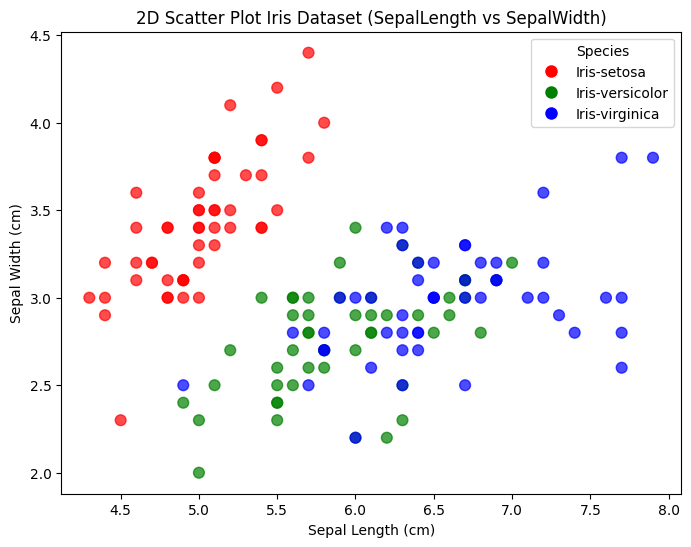

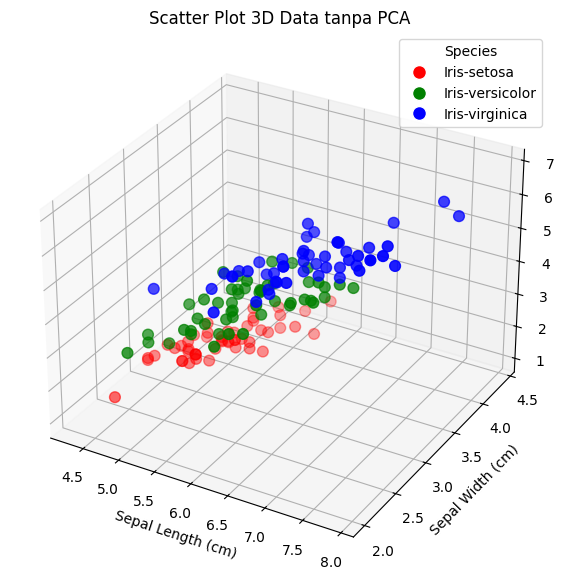

In [ ]:
# Pilih dua fitur
x = df['SepalLengthCm']
y = df['SepalWidthCm']
species = df['Species']

# Warna per species
colors = {
    'Iris-setosa': 'red',
    'Iris-versicolor': 'green',
    'Iris-virginica': 'blue'
}
color_values = [colors[s] for s in species]

# Plot scatter 2D
plt.figure(figsize=(8,6))
plt.scatter(x, y, c=color_values, s=60, alpha=0.7)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('2D Scatter Plot Iris Dataset (SepalLength vs SepalWidth)')

# Buat legenda
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=label,
                          markerfacecolor=col, markersize=10)
                   for label, col in colors.items()]
plt.legend(handles=legend_elements, title="Species")

plt.show()

# 3D
z = df['PetalLengthCm']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=color_values, s=60)

# Label sumbu
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
plt.title('Scatter Plot 3D Data tanpa PCA')

# Buat legenda
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=label,
                          markerfacecolor=col, markersize=10)
                   for label, col in colors.items()]
ax.legend(handles=legend_elements, title="Species")

plt.show()


### Visualisasi Menggunakan PCA

Penjelasan Principal Component Analysis (PCA)

**Principal Component Analysis (PCA)** adalah teknik reduksi dimensi yang sering digunakan dalam analisis data dan machine learning. Tujuan utama PCA adalah untuk mengubah data berdimensi tinggi menjadi data berdimensi lebih rendah, sambil tetap mempertahankan informasi sebanyak mungkin.

---

Cara Kerja PCA:

1. **Mengidentifikasi Variansi Maksimal**  
   PCA mencari arah (principal components) di mana data memiliki variansi terbesar. Arah ini disebut **komponen utama**.

2. **Membentuk Komponen Baru**  
   Komponen utama ini adalah kombinasi linear dari fitur asli, dan mereka ortogonal (tidak berkorelasi satu sama lain).

3. **Reduksi Dimensi**  
   Dengan memilih beberapa komponen utama pertama yang memiliki variansi terbesar, PCA mengurangi jumlah fitur tanpa kehilangan informasi penting secara signifikan.

---

Mengapa Menggunakan PCA?

- **Mengurangi kompleksitas data**  
  Data berdimensi tinggi bisa sangat sulit untuk dianalisis dan divisualisasikan. PCA menyederhanakan data.

- **Mengurangi kebisingan (noise)**  
  Dengan mengabaikan komponen dengan variansi kecil, PCA dapat membantu menghilangkan noise dari data.

- **Meningkatkan performa model**  
  Model machine learning seringkali bekerja lebih baik dan lebih cepat dengan data berdimensi lebih rendah.

---
Visualisasi dengan PCA

PCA sering digunakan untuk memproyeksikan data berdimensi tinggi ke ruang 2D atau 3D agar mudah divisualisasikan.

---

**Contoh:** Mengurangi fitur Iris dataset dari 4 fitur menjadi 2 fitur menggunakan PCA untuk visualisasi cluster.


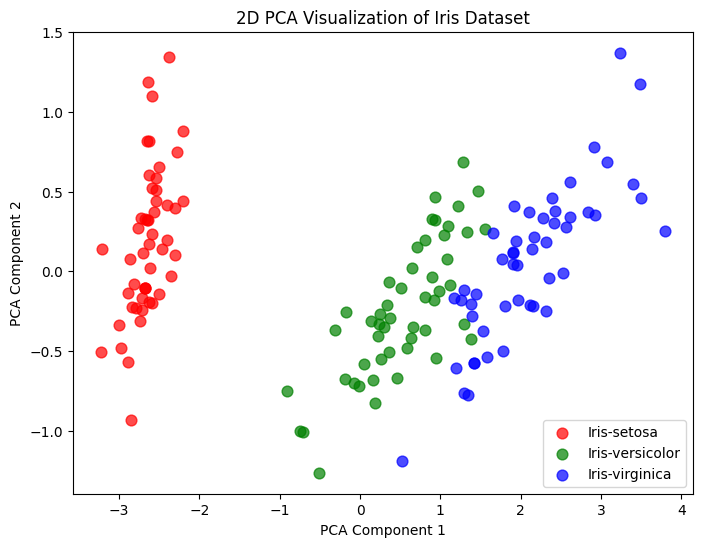

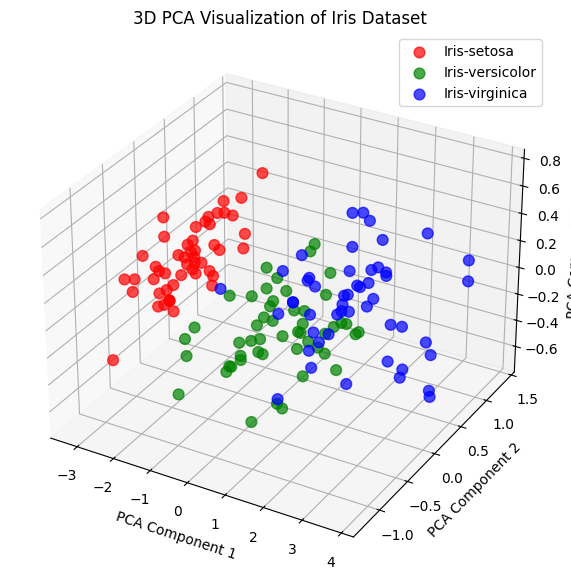

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


# Pilih fitur numerik saja
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Target (kelas)
y = df['Species']

# Warna tiap spesies
colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}
color_values = [colors[label] for label in y]

# ==== PCA 2D ====
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(8,6))
for species in colors:
    plt.scatter(X_pca_2d[y == species, 0], X_pca_2d[y == species, 1],
                label=species, c=colors[species], s=60, alpha=0.7)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA Visualization of Iris Dataset')
plt.legend()
plt.show()

# ==== PCA 3D ====
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
for species in colors:
    ax.scatter(X_pca_3d[y == species, 0], X_pca_3d[y == species, 1], X_pca_3d[y == species, 2],
               label=species, c=colors[species], s=60, alpha=0.7)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('3D PCA Visualization of Iris Dataset')
plt.legend()
plt.show()


### Kesimpulan

- Tanpa PCA = Data tetap asli, mudah dimengerti, namun sulit terlihat polanya jika fitur terlalu banyak.

- Dengan PCA = Data jadi lebih ringkas dan pola lebih jelas terlihat, tapi kita kehilangan makna asli tiap fitur.

Bisa diibaratkan seperti ini

- Tanpa PCA =  Seperti melihat peta besar dengan semua jalan, gang kecil, dan tempat. Lengkap, tapi bisa bikin bingung.

- Dengan PCA =  Seperti melihat peta ringkasan hanya jalan-jalan utama. Lebih sederhana, mudah dibaca, dan cukup untuk melihat arah atau pola.

## STANDARISASI

### Standarisasi dengan StandardScaler

 Penjelasan StandardScaler

**StandardScaler** adalah metode preprocessing data yang digunakan untuk melakukan **standarisasi fitur**. Tujuannya adalah mengubah data sehingga setiap fitur memiliki:

- Rata-rata (mean) = 0
- Standar deviasi (standard deviation) = 1

---

 Rumus StandardScaler

Untuk setiap nilai data \( x_i \) pada fitur, nilai yang sudah distandarisasi \( z_i \) dihitung dengan rumus:


$$
z_i = \frac{x_i - \mu}{\sigma}
$$

Dimana:

- $x_i$ = nilai asli data ke-$i$  
- $\mu$ = rata-rata dari seluruh nilai fitur tersebut  
- $\sigma$ = standar deviasi dari fitur tersebut


---

 Kenapa perlu standarisasi?

- **Menghilangkan skala berbeda antar fitur:**  
  Beberapa fitur mungkin punya rentang nilai yang besar, sementara fitur lain kecil. Standarisasi membuat semua fitur berada pada skala yang sama.

- **Mempercepat dan menstabilkan proses training model:**  
  Banyak algoritma machine learning, seperti K-Means, SVM, dan regresi, bekerja lebih baik atau konvergen lebih cepat dengan data yang sudah distandarisasi.

- **Menghindari dominasi fitur dengan skala besar:**  
  Jika tidak distandarisasi, fitur dengan nilai besar bisa mendominasi perhitungan jarak atau bobot model.

---

 Contoh sederhana:

Misal data fitur

$$
X = [10, 12, 14, 16, 18]
$$

Rata-rata $\mu = 14$  
Standar deviasi $\sigma \approx 3.16$


Maka nilai distandarisasi untuk \( x = 16 \):

$$
z = \frac{16 - 14}{3.16} \approx 0.63
$$

---


Pangeran menyadari bahwa beberapa kelopak (fitur) bunga terlalu besar, sementara yang lain terlalu kecil.  
Agar adil dan setara, ia menggunakan **mantra `StandardScaler`** dari kitab `sklearn`.

Mantra ini menyeimbangkan semua kelopak, sehingga setiap bunga bisa dinilai secara adil — tak peduli panjang atau lebarnya.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ubah ke DataFrame agar lebih mudah dibaca
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Tampilkan 5 data pertama hasil standarisasi
print (tabulate(df_scaled, headers='keys', tablefmt='github', showindex=False))


|   SepalLengthCm |   SepalWidthCm |   PetalLengthCm |   PetalWidthCm |
|-----------------|----------------|-----------------|----------------|
|      -0.900681  |       1.03206  |      -1.34127   |    -1.31298    |
|      -1.14302   |      -0.124958 |      -1.34127   |    -1.31298    |
|      -1.38535   |       0.337848 |      -1.39814   |    -1.31298    |
|      -1.50652   |       0.106445 |      -1.28441   |    -1.31298    |
|      -1.02185   |       1.26346  |      -1.34127   |    -1.31298    |
|      -0.537178  |       1.95767  |      -1.17068   |    -1.05003    |
|      -1.50652   |       0.800654 |      -1.34127   |    -1.1815     |
|      -1.02185   |       0.800654 |      -1.28441   |    -1.31298    |
|      -1.74886   |      -0.356361 |      -1.34127   |    -1.31298    |
|      -1.14302   |       0.106445 |      -1.28441   |    -1.44445    |
|      -0.537178  |       1.49486  |      -1.28441   |    -1.31298    |
|      -1.26418   |       0.800654 |      -1.22754   |    -1.312

### Standarisasi dengan Min-Max

Selain standar z-score, Pangeran juga belajar teknik lain yang lebih lembut
, dikenal sebagai **Min-Max Scaling**.  
Teknik ini menyulap semua nilai agar masuk ke rentang **0 hingga 1**, seperti menyusun bunga dari ukuran terkecil ke terbesar.


**Min-Max Scaler** adalah metode preprocessing data yang digunakan untuk **normalisasi** fitur. Tujuannya adalah mengubah data sehingga setiap fitur memiliki rentang nilai pada interval tertentu, biasanya antara 0 dan 1.

---

Rumus Min-Max Scaler

Untuk setiap nilai data $( x_i )$ pada fitur, nilai yang sudah dinormalisasi $( x_i')$ dihitung dengan rumus:

$$
x_i' = \frac{x_i - x_{min}}{x_{max} - x_{min}}
$$

Dimana:

- $x_i$ = nilai asli data ke-$i$  
- $x_{min}$ = nilai minimum dari fitur tersebut  
- $x_{max}$ = nilai maksimum dari fitur tersebut

---

Kenapa perlu normalisasi Min-Max?

- **Mengubah skala fitur ke rentang 0-1:**  
  Membuat fitur menjadi sebanding, terutama berguna untuk algoritma yang sensitif terhadap skala data seperti KNN, Neural Networks, dan Gradient Descent.

- **Mempertahankan bentuk distribusi data:**  
  Berbeda dengan StandardScaler, Min-Max tidak mengubah distribusi data menjadi rata-rata 0 dan standar deviasi 1, tapi tetap mempertahankan proporsi nilai asli.

- **Sangat berguna jika data punya batas nilai yang pasti:**  
  Misalnya nilai pixel gambar yang memang berada di antara 0 dan 255.

---

Contoh sederhana:

Misal data fitur:

$$
X = [10, 12, 14, 16, 18]
$$

- Nilai minimum $( x_{min} = 10 )$  
- Nilai maksimum $( x_{max} = 18 )$

Maka nilai normalisasi untuk $( x = 16 )$:

$$
x' = \frac{16 - 10}{18 - 10} = \frac{6}{8} = 0.75
$$


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Ubah ke DataFrame agar lebih mudah dibaca
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Tampilkan 5 data pertama hasil normalisasi
print (tabulate(df_normalized, headers='keys', tablefmt='github', showindex=False))


|   SepalLengthCm |   SepalWidthCm |   PetalLengthCm |   PetalWidthCm |
|-----------------|----------------|-----------------|----------------|
|       0.222222  |      0.625     |       0.0677966 |      0.0416667 |
|       0.166667  |      0.416667  |       0.0677966 |      0.0416667 |
|       0.111111  |      0.5       |       0.0508475 |      0.0416667 |
|       0.0833333 |      0.458333  |       0.0847458 |      0.0416667 |
|       0.194444  |      0.666667  |       0.0677966 |      0.0416667 |
|       0.305556  |      0.791667  |       0.118644  |      0.125     |
|       0.0833333 |      0.583333  |       0.0677966 |      0.0833333 |
|       0.194444  |      0.583333  |       0.0847458 |      0.0416667 |
|       0.0277778 |      0.375     |       0.0677966 |      0.0416667 |
|       0.166667  |      0.458333  |       0.0847458 |      0         |
|       0.305556  |      0.708333  |       0.0847458 |      0.0416667 |
|       0.138889  |      0.583333  |       0.101695  |      0.04

### Kesimpulan

- Standard Scaler :
  * Tujuannya mengubah data agar punya rata-rata 0 dan standar deviasi 1
  * Outputnya bisa bernilai negative atau lebih dari 1

- Min-max Scaler :
  * Mengubah data dengan rentang 0 hingga 1
  * Output selalu diantara 0 dan 1

## Mengelompokkan Data (Tanpa Standarisasi)

Pangeran ingin tahu apakah bunga-bunga bisa dikelompokkan secara otomatis tanpa tahu spesies aslinya.  

Dengan bantuan **KMeans**, ia mencoba membagi bunga-bunga ke dalam **2 kelompok** hanya berdasarkan bentuk dan ukuran.

Apakah kelompok itu mencerminkan spesies? Pangeran penasaran!


In [ ]:
from sklearn.cluster import KMeans

K = 2  # jumlah klaster
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values


# Jalankan KMeans
kmeans = KMeans(n_clusters=K, random_state=42, n_init='auto') # Add n_init='auto' to avoid future warnings
kmeans.fit(X)  # Gunakan data mentah tanpa normalisasi

# Simpan hasil klaster ke DataFrame
df['Cluster'] = kmeans.labels_

# Tampilkan centroid dan label
print("Centroid:\n", kmeans.cluster_centers_)  # Menampilkan koordinat centroid masing-masing klaster
print("\nLabels:\n", kmeans.labels_)  # Menampilkan label klaster untuk setiap data point


Centroid:
 [[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36037736 1.56226415 0.28867925]]

Labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


### Implementasi algoritma K-Means clustering secara manual (tanpa menggunakan sklearn.KMeans)

In [ ]:
# # --- IMPUTASI NILAI HILANG JIKA ADA ---
imputer = SimpleImputer(strategy='mean')  # Gunakan rata-rata untuk mengisi nilai yang hilang
X_imputed = imputer.fit_transform(X)      # Terapkan imputasi pada data fitur X

# --- DEFINISI K-MEANS MANUAL ---
def euclidean_distance(a, b):
    a = np.asarray(a)                      # Konversi ke array NumPy
    b = np.asarray(b)
    return np.linalg.norm(a - b, axis=1)   # Hitung jarak Euclidean antar vektor data dan centroid

def initialize_centroids(X, k):
    np.random.seed(42)                     # Seed acak untuk hasil yang konsisten
    indices = np.random.choice(len(X), k, replace=False)  # Ambil k indeks acak sebagai centroid awal
    return X[indices]                      # Kembalikan centroid awal berdasarkan indeks tersebut

def assign_clusters(X, centroids):
    distances = np.array([euclidean_distance(X, centroid) for centroid in centroids]).T
    # Hitung jarak dari tiap titik ke tiap centroid, kemudian transpose agar bentuknya (n_samples, n_clusters)
    return np.argmin(distances, axis=1)    # Tentukan klaster (berdasarkan jarak terdekat) untuk tiap titik

def update_centroids(X, labels, k):
    new_centroids = np.zeros((k, X.shape[1]))  # Inisialisasi centroid baru
    for i in range(k):
        cluster_points = X[labels == i]        # Ambil semua titik yang termasuk ke cluster i
        if len(cluster_points) > 0:
            new_centroids[i] = cluster_points.mean(axis=0)  # Hitung rata-rata sebagai centroid baru
        else:
            print(f"Warning: Cluster {i} is empty. Reinitializing centroid.")
            new_centroids[i] = initialize_centroids(X, 1)[0]  # Jika kosong, pilih ulang satu centroid acak
    return new_centroids


### Inisialisasi Centroid

Pangeran tak puas hanya dengan hasil akhir. Ia ingin tahu **bagaimana bunga-bunga dikelompokkan secara bertahap**.  
Ia pun menyusun algoritma K-Means dari awal, memulai dari **centroid acak**, lalu terus memperbarui sampai posisi mereka berhenti berubah.

Dalam tiap langkah, Pangeran mengecek apakah **centroid sudah stabil** jika sudah, berarti **K-Means telah mencapai konvergensi** dan kelompok bunga pun resmi terbentuk!

In [ ]:
# --- EKSEKUSI ITERASI ---
centroids = initialize_centroids(X_imputed, K)   # Inisialisasi centroid awal secara acak
prev_centroids = centroids.copy()                # Salin centroid sebagai acuan perbandingan iterasi selanjutnya
iteration = 0                                    # Hitung iterasi dimulai dari 0
max_iter = 100                                   # Batas maksimum iterasi untuk mencegah infinite loop
tol = 1e-4                                       # Toleransi perubahan centroid untuk menentukan konvergensi

print(f"Mulai K-Means dengan K={K}")          # Informasi jumlah cluster saat mulai

while iteration < max_iter:                      # Ulangi selama belum mencapai iterasi maksimum
    labels = assign_clusters(X_imputed, prev_centroids)     # Tentukan klaster untuk setiap titik berdasarkan centroid saat ini
    new_centroids = update_centroids(X_imputed, labels, K)  # Perbarui centroid berdasarkan rata-rata titik tiap klaster

    if np.allclose(new_centroids, prev_centroids, atol=tol):  # Cek apakah perubahan centroid cukup kecil (konvergen)
        print(f"Konvergen di iterasi ke-{iteration + 1}")      # Cetak informasi konvergensi
        break                                                  # Hentikan iterasi jika sudah konvergen

    prev_centroids = new_centroids     # Perbarui centroid lama dengan yang baru
    iteration += 1                     # Tambah hitungan iterasi
else:
    print(f"Mencapai iterasi maksimum ({max_iter}) tanpa konvergensi.")  # Jika loop selesai tanpa konvergen, tampilkan info

final_centroids = prev_centroids  # Simpan centroid terakhir sebagai hasil akhir clustering
final_labels = assign_clusters(X_imputed, final_centroids)  # Tentukan kembali label klaster untuk semua data berdasarkan centroid final

print(f"Iterasi selesai setelah {iteration} iterasi.\n")  # Tampilkan jumlah iterasi yang dijalankan
print("Centroid akhir:")  # Tampilkan informasi teks sebelum mencetak centroid
print(pd.DataFrame(final_centroids, columns=selected_columns.columns))  # Cetak posisi akhir centroid dalam bentuk tabel (DataFrame)



Mulai K-Means dengan K=2
Konvergen di iterasi ke-4
Iterasi selesai setelah 3 iterasi.

Centroid akhir:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       6.301031      2.886598       4.958763      1.695876
1       5.005660      3.360377       1.562264      0.288679


### Output

### Jarak euclidian distance

Setelah kelompok bunga terbentuk, Pangeran penasaran:  
"Seberapa dekat sih setiap bunga ke pusat klasternya?"

Ia pun menghitung **jarak Euclidean** dari setiap bunga ke tiap centroid.  
Jarak ini jadi petunjuk: makin kecil jaraknya, makin cocok bunga itu tinggal di klaster tersebut.

Inilah cara Pangeran mengintip hati tiap bunga... melalui matematika.

Euclidean Distance adalah jarak "lurus" antara dua titik dalam ruang berdimensi \(n\).

Misalkan ada dua titik  
$$
\mathbf{a} = (a_1, a_2, ..., a_n)
$$  
dan  
$$
\mathbf{b} = (b_1, b_2, ..., b_n)
$$  
Maka rumus Euclidean Distance antara titik \(\mathbf{a}\) dan \(\mathbf{b}\) adalah:

$$
d(\mathbf{a}, \mathbf{b}) = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + \cdots + (a_n - b_n)^2}
$$

atau dalam bentuk sigma:

$$
d(\mathbf{a}, \mathbf{b}) = \sqrt{\sum_{i=1}^n (a_i - b_i)^2}
$$

---

 Contoh

Misal dua titik di 2 dimensi:

$$
\mathbf{a} = (3, 4), \quad \mathbf{b} = (7, 1)
$$

Jarak Euclidean-nya adalah:

$$
d(\mathbf{a}, \mathbf{b}) = \sqrt{(3 - 7)^2 + (4 - 1)^2} = \sqrt{(-4)^2 + 3^2} = \sqrt{16 + 9} = \sqrt{25} = 5
$$

---


In [ ]:
from scipy.spatial.distance import cdist

# Hitung jarak Euclidean dari setiap data ke setiap centroid
euclidean_distances = cdist(X_imputed, final_centroids, metric='euclidean')

# Konversi ke DataFrame agar lebih mudah dibaca
distance_df = pd.DataFrame(euclidean_distances, columns=[f'Centroid_{i}' for i in range(final_centroids.shape[0])])

# Tampilkan semua jarak
print("Jarak Euclidean ke masing-masing centroid:")
print(tabulate(distance_df,headers='keys', tablefmt='github', showindex=False))


Jarak Euclidean ke masing-masing centroid:
|   Centroid_0 |   Centroid_1 |
|--------------|--------------|
|     4.08915  |     0.250176 |
|     4.10831  |     0.418604 |
|     4.27618  |     0.442488 |
|     4.14002  |     0.494062 |
|     4.13571  |     0.302729 |
|     3.76001  |     0.691419 |
|     4.21549  |     0.438849 |
|     4.01957  |     0.115511 |
|     4.30308  |     0.782921 |
|     4.06427  |     0.344147 |
|     3.95906  |     0.53159  |
|     4.00445  |     0.230552 |
|     4.18062  |     0.483836 |
|     4.63183  |     0.936545 |
|     4.22571  |     1.08591  |
|     4.03658  |     1.25666  |
|     4.11153  |     0.726547 |
|     4.05364  |     0.234206 |
|     3.70993  |     0.833352 |
|     4.02347  |     0.454063 |
|     3.73264  |     0.428846 |
|     3.96818  |     0.37485  |
|     4.61648  |     0.738908 |
|     3.69635  |     0.275995 |
|     3.75637  |     0.40718  |
|     3.90186  |     0.373084 |
|     3.86223  |     0.12417  |
|     3.97356  |     0.262685

### Hitung Inertia

Pangeran penasaran, “Seberapa rapih sih klaster yang sudah terbentuk?”  
Ia menghitung **inertia**, yaitu jumlah kuadrat jarak semua bunga ke pusat klasternya.

Nilai inertia yang kecil berarti bunga-bunga dalam satu klaster sangat dekat satu sama lain — grup yang kompak dan rapih!

Inertia dalam K-Means Clustering

**Inertia** adalah ukuran seberapa baik data dikelompokkan oleh K-Means. Ini merupakan jumlah kuadrat jarak antara setiap titik data dengan centroid klaster yang paling dekat.

Secara matematis, inertia \( I \) didefinisikan sebagai:

$$
I = \sum_{k=1}^K \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$

Dimana:

- $( K $) = jumlah klaster  
- $( C_k $) = kumpulan titik data pada klaster ke-\( k \)  
- $( x_i $) = titik data ke-\( i \) dalam klaster ke-\( k \)  
- $( \mu_k $) = centroid klaster ke-\( k \)  
- $( \| x_i - \mu_k \|^2 )$ = jarak Euclidean kuadrat antara titik data dan centroidnya

---
Penjelasan

- **Inertia kecil** menunjukkan bahwa titik-titik data dekat dengan centroid klasternya — artinya klaster yang terbentuk compact dan bagus.  
- **Inertia besar** berarti titik-titik tersebar jauh dari centroid, sehingga klaster kurang baik.


In [ ]:
print(f"Inertia dari {K}:", kmeans.inertia_) # Cukup panggil library saja

Inertia dari 2: 152.36870647733915


### Hitung Shillouette

Pangeran ingin tahu seberapa baik kelompok bunga terbentuk.  
Ia menggunakan **Silhouette Score**, sebuah ukuran yang mengombinasikan kedekatan bunga ke klasternya sendiri dan jarak ke klaster lain.

Nilai skor mendekati 1 berarti klaster terpisah jelas dan rapih. Skor mendekati 0 berarti klaster saling berdempetan, dan negatif berarti ada yang salah tempat!

Dengan ini, Pangeran bisa memastikan kelompoknya sudah pas.

**Silhouette Score** digunakan untuk mengukur seberapa baik objek-objek dalam suatu klaster cocok dengan klasternya sendiri dibandingkan dengan klaster lain.

Untuk setiap titik data \(i\), dihitung dua nilai:

- $( a(i) $): rata-rata jarak antara titik \(i\) dengan semua titik lain dalam klasternya sendiri (intra-cluster distance).  
- $( b(i) $): rata-rata jarak antara titik \(i\) dengan semua titik di klaster terdekat berikutnya (nearest-cluster distance).

Silhouette score $( s(i) $) untuk titik \(i\) didefinisikan sebagai:

$$
s(i) = \frac{b(i) - a(i)}{\max \{ a(i), b(i) \}}
$$

Nilai $( s(i) $) berkisar antara $(-1$) sampai \(1\):

- Nilai mendekati $(1$) menunjukkan titik sangat cocok dengan klasternya sendiri dan jauh dari klaster lain (klaster baik).  
- Nilai mendekati $(0$) menunjukkan titik berada di batas antar klaster.  
- Nilai mendekati $(-$\) menunjukkan titik mungkin salah penempatan ke klaster yang salah.

---

Rata-rata Silhouette Score

Untuk menilai keseluruhan kualitas klaster, dihitung rata-rata semua $( s(i) $):

$$
S = \frac{1}{n} \sum_{i=1}^n s(i)
$$

Dimana $(n$) adalah jumlah total titik data.

---

In [ ]:
from sklearn.metrics import silhouette_score   # Untuk menghitung skor silhouette clustering
from sklearn.cluster import KMeans              # Algoritma KMeans clustering

def find_optimal_k(X, max_k=10):
    """
    Mencari nilai K optimal untuk K-Means berdasarkan Silhouette Score.

    Parameters:
        X (array-like): Data yang akan di-cluster.
        max_k (int): Jumlah maksimum K yang akan diuji.

    Returns:
        best_k (int): Nilai K terbaik berdasarkan Silhouette Score.
        silhouette_scores (list): Daftar Silhouette Score untuk setiap K.
    """
    silhouette_scores = []  # List untuk menyimpan skor silhouette tiap K

    # Loop untuk mencoba nilai K dari 2 sampai max_k
    for k in range(2, max_k + 1):
        # Buat model KMeans dengan k cluster, seed 42 agar hasil konsisten
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

        # Jalankan clustering dan dapatkan label cluster tiap data
        labels = kmeans.fit_predict(X)

        # Jika clustering menghasilkan hanya 1 cluster, skor silhouette tidak valid
        if len(np.unique(labels)) == 1:
            silhouette_scores.append(-1)  # Beri nilai -1 sebagai tanda tidak valid
            continue  # Lanjutkan ke k berikutnya

        # Hitung silhouette score untuk hasil clustering ini
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)  # Simpan skor

        print(f"K={k}, Silhouette Score: {score:.4f}")  # Tampilkan skor untuk tiap K

    # Temukan indeks K dengan skor silhouette tertinggi
    best_k = np.argmax(silhouette_scores) + 2  # +2 karena K dimulai dari 2

    print(f"\nNilai K optimal: {best_k} (Silhouette Score: {max(silhouette_scores):.4f})")

    # Kembalikan nilai K terbaik dan daftar skor silhouette
    return best_k, silhouette_scores

# Contoh penggunaan fungsi:
if __name__ == "__main__":
    from sklearn.datasets import make_blobs

    # Buat data contoh dengan 3 cluster
    X, _ = make_blobs(n_samples=500, centers=3, random_state=42)

    # Gunakan data
    best_k, scores = find_optimal_k(X, max_k=10)


K=2, Silhouette Score: 0.7031
K=3, Silhouette Score: 0.8438
K=4, Silhouette Score: 0.6697
K=5, Silhouette Score: 0.4968
K=6, Silhouette Score: 0.3247
K=7, Silhouette Score: 0.3125
K=8, Silhouette Score: 0.3359
K=9, Silhouette Score: 0.3447
K=10, Silhouette Score: 0.3361

Nilai K optimal: 3 (Silhouette Score: 0.8438)


### Visualisasi Clustering K-means

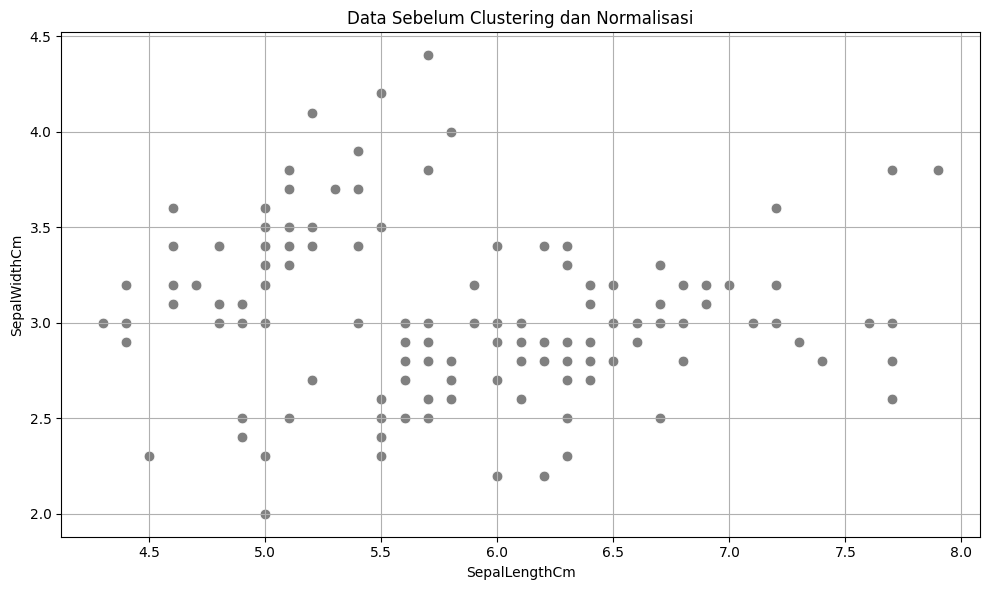

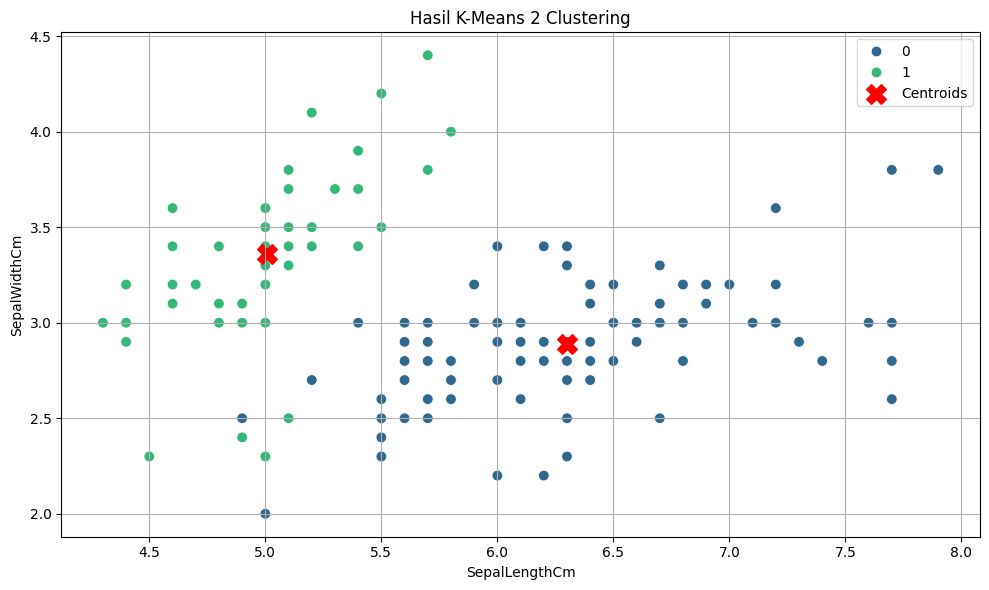

In [ ]:
import seaborn as sns

# Define x_axis and y_axis
x_axis = 'SepalLengthCm'
y_axis = 'SepalWidthCm'

# 1. Plot data asli sebelum clustering dan normalisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=x_axis, y=y_axis, color='gray', s=60)
plt.title('Data Sebelum Clustering dan Normalisasi')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Plot hasil clustering (yang sudah kamu punya)
plot_df = df.copy()
plot_df['cluster'] = final_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x=x_axis, y=y_axis, hue='cluster', palette='viridis', s=60)

# yang sudah dicluster
plt.scatter(
    final_centroids[:, selected_columns.columns.get_loc(x_axis)],
    final_centroids[:, selected_columns.columns.get_loc(y_axis)],
    s=200,
    c='red',
    marker='X',
    label='Centroids'
)

plt.title(f'Hasil K-Means {K} Clustering')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

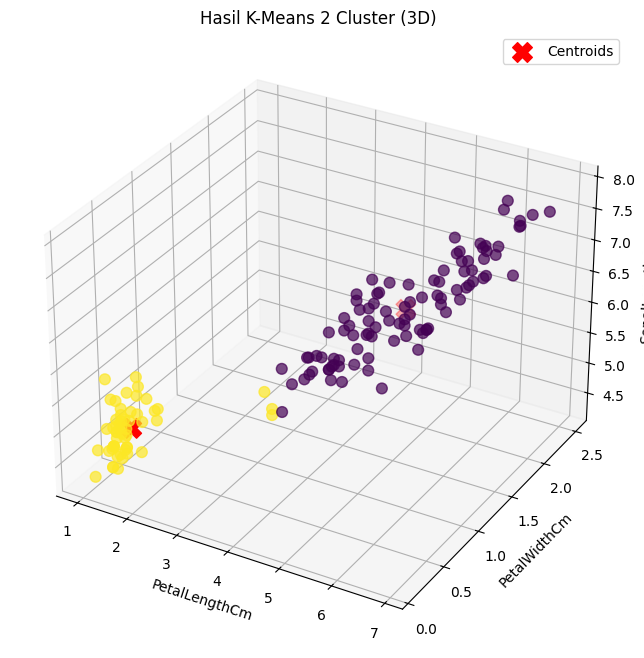

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Pilih 3 fitur untuk visualisasi 3D
x_axis = 'PetalLengthCm'
y_axis = 'PetalWidthCm'
z_axis = 'SepalLengthCm'

# Buat DataFrame hasil clustering dengan menggabungkan df asli dan hasil clustering
plot_df = df.copy()
plot_df['cluster'] = final_labels

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot titik data, warna berdasarkan cluster
scatter = ax.scatter(
    plot_df[x_axis],
    plot_df[y_axis],
    plot_df[z_axis],
    c=plot_df['cluster'],
    cmap='viridis',
    s=60,
    alpha=0.7
)

# Plot centroid (sesuaikan index fitur di centroid)
ax.scatter(
    # Correctly use .columns.get_loc() to get the index of the column
    final_centroids[:, selected_columns.columns.get_loc(x_axis)],
    final_centroids[:, selected_columns.columns.get_loc(y_axis)],
    final_centroids[:, selected_columns.columns.get_loc(z_axis)],
    s=200,
    c='red',
    marker='X',
    label='Centroids'
)

ax.set_xlabel(x_axis)
ax.set_ylabel(y_axis)
ax.set_zlabel(z_axis)
ax.set_title(f'Hasil K-Means {K} Cluster (3D)')
ax.legend()

plt.show()